In [1]:
import numpy as np
import matplotlib as matplotlib

In [2]:
points_list = [(0,1), (0,3), (1,2), (1,4), (1,5), (1,8), (2,7), (5,6), (5,9), (7,9), (4,7), (3,8), (3,4), (8,9)]

In [3]:
mouse = [3,5]
cat = [4,6,8]

In [4]:
cheese = 9

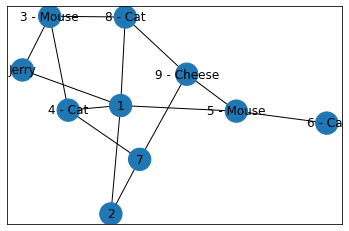

In [6]:
import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
mapping={0:'Jerry', 1:'1', 2:'2', 3:'3 - Mouse',
    4:'4 - Cat', 5:'5 - Mouse', 6:'6 - Cat', 7:'7', 8:'8 - Cat', 9:'9 - Cheese'}
H=nx.relabel_nodes(G,mapping)
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H,pos,
    node_size=[500,500,500,500,500,500,500,500,500,500])
nx.draw_networkx_edges(H,pos)
nx.draw_networkx_labels(H,pos)
matplotlib.pyplot.show()

# The map shows the cell to cell route that Jerry has to scout while dealing with other mouse and avoiding cat

In [7]:
MATRIX_SIZE = 10

In [8]:
Initial_Cheese_Path_Matrix = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
Initial_Cheese_Path_Matrix *= -1

# Question: Define values of viable path = 0 and for path leading to cheese = 100.

In [73]:
# Your code here


(0, 1)
(0, 3)
(1, 2)
(1, 4)
(1, 5)
(1, 8)
(2, 7)
(5, 6)
(5, 9)
(7, 9)
(4, 7)
(3, 8)
(3, 4)
(8, 9)


In [9]:
Initial_Cheese_Path_Matrix

matrix([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])

# To read the above matrix, the vertical values in the first column are the states or where Jerry is currently located, and the horizontal values are your possible next actions. We will use this matrix to update the values as Jerry learns which path it should take and which one to avoid.

# We have assigned nodes 3 & 5 as mouse with which Jerry has to race and nodes 5,6,8 as cat that Jerry has to avoid. Jerry doesn’t know yet that there are other mouse or cats nor does it know that cats are bad as they will eat Jerry. Jerry needs to explore the environment, but this time it needs to deal with environment also.

In [13]:
matrix = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
gamma = 0.8
mouse_present = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
cat_present = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

In [14]:
initial_state = 1

In [15]:
def available_actions(state):
    current_state_row = Initial_Cheese_Path_Matrix[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

def collect_environmental_data(action):
    found = []
    if action in mouse:
        found.append('m')

    if action in cat:
        found.append('c')
    return (found)

available_act = available_actions(initial_state)

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    max_index = np.where(matrix[action,] == np.max(matrix[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = matrix[action, max_index]

    matrix[current_state, action] = Initial_Cheese_Path_Matrix[current_state, action] + gamma * max_value
    print('max_value', Initial_Cheese_Path_Matrix[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'm' in environment:
        mouse_present[current_state, action] += 1

    if 'c' in environment:
        cat_present[current_state, action] += 1

    if (np.max(matrix) > 0):
        return(np.sum(matrix/np.max(matrix)*100))
    else:
        return (0)

update(initial_state,action,gamma)

scores = []
for i in range(700):
    current_state = np.random.randint(0, int(matrix.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)

ValueError: 'a' cannot be empty unless no samples are taken

# Print where other mouse and cat were found

In [96]:
print('Mouse Found')
print(mouse_present)
print('Cat Found')
print(cat_present)

Mouse Found
[[ 0.  0.  0. 32.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 12.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 25.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 55.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 23.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 26.  0.  0.  0.  0.]]
Cat Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 17.  0.  0.  0. 14.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 23.  0.  0.  0. 22.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 18.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 25.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 19.  0.]]


# Giving a negative value to cat so that Jerry avoids that route

In [80]:
# Your code here

In [81]:
available_act = available_actions(initial_state)

In [82]:
action = sample_next_action(available_act)

# Question: Update the initial cheese path matrix according to the path selected

In [87]:
def update(current_state, action, gamma):

    ____________________________________________________

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = matrix[action, max_index]

    matrix[current_state, action] = __________________________________________________________
    print('max_value', Initial_Cheese_Path_Matrix[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'b' in environment:
        enviro_matrix[current_state, action] += 1
    if 's' in environment:
        enviro_matrix[current_state, action] -= 1

    return(np.sum(matrix/np.max(matrix)*100))

update(initial_state,action,gamma)

enviro_matrix_snap = enviro_matrix.copy()

def available_actions_with_enviro_help(state):
    current_state_row = Initial_Cheese_Path_Matrix[state,]
    av_act = ________________________________
    # Jerry will not take any route with even a single negative value as Jerry does not want to be in danger
    env_pos_row = enviro_matrix_snap[state,av_act]
    if (np.sum(env_pos_row < 0)):
        temp_av_act = ________________________________
        if len(temp_av_act) > 0:
            print('going from:',av_act)
            print('to:',temp_av_act)
            av_act = temp_av_act
    return av_act

max_value 316.31065118525817


# Training for 1500 iterations

In [97]:
# Your code here

max_value 313.58687413062455
Score: 2096.7054267577437
max_value 313.58687413062455
Score: 2096.7054267577437
max_value 494.86949930449964
Score: 2092.259231714177
going from: [0 4 8]
to: [0]
max_value 250.86949930449964
Score: 2092.259231714177
going from: [2 4 9]
to: [2 9]
max_value 313.58687413062455
Score: 2092.988188197976
max_value 313.58687413062455
Score: 2092.988188197976
max_value 313.58687413062455
Score: 2093.717144681775
max_value 313.58687413062455
Score: 2094.446101165574
max_value 313.58687413062455
Score: 2094.446101165574
max_value 313.58687413062455
Score: 2094.446101165574
max_value 313.58687413062455
Score: 2094.446101165574
max_value 313.58687413062455
Score: 2094.446101165574
max_value 313.58687413062455
Score: 2094.446101165574
going from: [0 2 4 5 8]
to: [0 2 5]
max_value 391.98359266328066
Score: 2095.3572967703226
going from: [0 4 8]
to: [0]
max_value 250.86949930449964
Score: 2095.3572967703226
max_value 313.58687413062455
Score: 2095.3572967703226
max_value

Score: 2100.141216774322
max_value 398.65507002567887
Score: 2100.141216774322
max_value 398.65507002567887
Score: 2100.141216774322
going from: [0 2 4 5 8]
to: [0 2 5]
max_value 317.3731836439039
Score: 2100.141216774322
max_value 313.58687413062455
Score: 2100.141216774322
going from: [0 2 4 5 8]
to: [0 2 5]
max_value 317.3731836439039
Score: 2100.141216774322
going from: [2 4 9]
to: [2 9]
max_value 317.3731836439039
Score: 2100.141216774322
max_value 398.65507002567887
Score: 2100.530242900727
max_value 313.58687413062455
Score: 2100.530242900727
max_value 316.7164795548798
Score: 2100.530242900727
going from: [2 4 9]
to: [2 9]
max_value 318.9240560205431
Score: 2100.841463801851
max_value 313.58687413062455
Score: 2100.841463801851
going from: [0 4 8]
to: [0]
max_value 253.37318364390387
Score: 2100.841463801851
max_value 316.7164795548798
Score: 2100.841463801851
max_value 313.58687413062455
Score: 2100.841463801851
max_value 498.31883753209854
Score: 2100.841463801851
going from:

Score: 2101.188666010981
going from: [0 2 4 5 8]
to: [0 2 5]
max_value 399.4491166825181
Score: 2101.347694357506
max_value 499.3113958531476
Score: 2101.347694357506
max_value 319.5592933460145
Score: 2101.474917034727
max_value 319.5592933460145
Score: 2101.602139711947
max_value 319.5592933460145
Score: 2101.729362389168
going from: [5 7 8 9]
to: [5 7 9]
max_value 499.3113958531476
Score: 2101.7638400794713
max_value 313.58687413062455
Score: 2101.7638400794713
max_value 313.58687413062455
Score: 2101.7638400794713
going from: [1 6 9]
to: [1 9]
max_value 499.4491166825181
Score: 2101.211862776777
going from: [1 6 9]
to: [1 9]
max_value 319.5592933460145
Score: 2101.3390503729206
going from: [1 6 9]
to: [1 9]
max_value 319.5592933460145
Score: 2101.3390503729206
going from: [5 7 8 9]
to: [5 7 9]
max_value 399.5592933460145
Score: 2101.5200945053725
going from: [5 7 8 9]
to: [5 7 9]
max_value 399.5592933460145
Score: 2101.5200945053725
max_value 399.5592933460145
Score: 2101.701138637

going from: [5 7 8 9]
to: [5 7 9]
max_value 399.77435819315946
Score: 2102.5051730310615
max_value 319.8194865545276
Score: 2102.539602828609
max_value 319.8194865545276
Score: 2102.5740326261566
going from: [0 4 8]
to: [0]
max_value 255.71794774144928
Score: 2102.5740326261566
going from: [1 6 9]
to: [1 9]
max_value 499.7179477414493
Score: 2102.5740326261566
max_value 399.77435819315946
Score: 2102.585321084369
max_value 313.58687413062455
Score: 2102.585321084369
max_value 319.8194865545276
Score: 2102.6197508819164
going from: [0 4 8]
to: [0]
max_value 255.71794774144928
Score: 2102.6197508819164
max_value 319.8194865545276
Score: 2102.654180679464
going from: [0 4 8]
to: [0]
max_value 255.8555892436221
Score: 2102.681724517502
max_value 399.77435819315946
Score: 2102.681724517502
max_value 319.8194865545276
Score: 2102.681724517502
going from: [0 2 4 5 8]
to: [0 2 5]
max_value 399.77435819315946
Score: 2102.681724517502
max_value 313.58687413062455
Score: 2102.681724517502
going f

Score: 2102.5058374422406
max_value 499.8555892436221
Score: 2102.5058374422406
max_value 499.8555892436221
Score: 2102.5058374422406
max_value 319.8555892436221
Score: 2102.5130600661087
max_value 313.58687413062455
Score: 2102.5130600661087
max_value 319.8555892436221
Score: 2102.5130600661087
going from: [0 4 8]
to: [0]
max_value 255.88447139489767
Score: 2102.518838165203
going from: [2 4 9]
to: [2 9]
max_value 319.8844713948977
Score: 2102.518838165203
max_value 319.8555892436221
Score: 2102.518838165203
going from: [0 2 4 5 8]
to: [0 2 5]
max_value 255.88447139489767
Score: 2102.5246162642975
max_value 319.8555892436221
Score: 2102.5246162642975
going from: [2 4 9]
to: [2 9]
max_value 319.8844713948977
Score: 2102.5246162642975
max_value 319.8555892436221
Score: 2102.5246162642975
going from: [2 4 9]
to: [2 9]
max_value 319.8844713948977
Score: 2102.5246162642975
going from: [0 4 8]
to: [0]
max_value 255.88447139489767
Score: 2102.5246162642975
going from: [2 4 9]
to: [2 9]
max_v

going from: [1 6 9]
to: [1 9]
max_value 499.95267948335015
Score: 2102.3126451858457
going from: [2 4 9]
to: [2 9]
max_value 319.95267948335015
Score: 2102.3126451858457
max_value 319.8555892436221
Score: 2102.3126451858457
max_value 399.96214358668016
Score: 2102.3126451858457
going from: [5 7 8 9]
to: [5 7 9]
max_value 499.95267948335015
Score: 2102.3150114356226
max_value 399.96214358668016
Score: 2102.3150114356226
going from: [5 7 8 9]
to: [5 7 9]
max_value 399.96214358668016
Score: 2102.316904435444
going from: [2 4 9]
to: [2 9]
max_value 319.95267948335015
Score: 2102.316904435444
going from: [0 4 8]
to: [0]
max_value 255.88447139489767
Score: 2102.316904435444
going from: [5 7 8 9]
to: [5 7 9]
max_value 399.96214358668016
Score: 2102.316904435444
going from: [0 2 4 5 8]
to: [0 2 5]
max_value 319.95267948335015
Score: 2102.316904435444
going from: [2 4 9]
to: [2 9]
max_value 319.95267948335015
Score: 2102.316904435444
max_value 313.58687413062455
Score: 2102.316904435444
going f

going from: [0 2 4 5 8]
to: [0 2 5]
max_value 255.99007616838676
Score: 2102.47041728516
going from: [0 4 8]
to: [0]
max_value 255.99007616838676
Score: 2102.47041728516
going from: [2 4 9]
to: [2 9]
max_value 319.98759521048345
Score: 2102.47041728516
going from: [2 4 9]
to: [2 9]
max_value 499.98061751638033
Score: 2102.47041728516
going from: [1 6 9]
to: [1 9]
max_value 499.98061751638033
Score: 2102.47041728516
going from: [2 4 9]
to: [2 9]
max_value 319.98759521048345
Score: 2102.47041728516
going from: [1 6 9]
to: [1 9]
max_value 319.98759521048345
Score: 2102.47041728516
going from: [0 4 8]
to: [0]
max_value 255.99007616838676
Score: 2102.47041728516
going from: [1 6 9]
to: [1 9]
max_value 319.98759521048345
Score: 2102.47041728516
going from: [0 4 8]
to: [0]
max_value 255.99007616838676
Score: 2102.47041728516
max_value 319.98759521048345
Score: 2102.47041728516
max_value 399.98449401310427
Score: 2102.47041728516
max_value 399.98449401310427
Score: 2102.47041728516
max_value 3

max_value 255.99206093470946
Score: 2102.4512308284925
going from: [5 7 8 9]
to: [5 7 9]
max_value 499.99206093470946
Score: 2102.4516277880603
going from: [0 2 4 5 8]
to: [0 2 5]
max_value 255.99206093470946
Score: 2102.4516277880603
max_value 399.99364874776757
Score: 2102.4516277880603
going from: [5 7 8 9]
to: [5 7 9]
max_value 399.99364874776757
Score: 2102.4516277880603
max_value 319.9949189982141
Score: 2102.452596369405
max_value 399.99364874776757
Score: 2102.452596369405
max_value 319.9949189982141
Score: 2102.452596369405
max_value 319.9949189982141
Score: 2102.4535649507498
max_value 399.99364874776757
Score: 2102.4535649507498
max_value 399.99364874776757
Score: 2102.4535649507498
max_value 399.99364874776757
Score: 2102.4535649507498
max_value 313.58687413062455
Score: 2102.4535649507498
going from: [0 4 8]
to: [0]
max_value 255.99593519857126
Score: 2102.454339815825
going from: [0 4 8]
to: [0]
max_value 255.99593519857126
Score: 2102.454339815825
going from: [1 6 9]
to:

max_value 499.99593519857126
Score: 2102.449946401126
going from: [0 4 8]
to: [0]
max_value 255.99739852708564
Score: 2102.449946401126
going from: [0 4 8]
to: [0]
max_value 255.99739852708564
Score: 2102.449946401126
max_value 399.99593519857126
Score: 2102.449946401126
max_value 319.99674815885703
Score: 2102.4501089945047
going from: [0 2 4 5 8]
to: [0 2 5]
max_value 399.99593519857126
Score: 2102.4501089945047
max_value 319.99674815885703
Score: 2102.4501089945047
max_value 399.99593519857126
Score: 2102.4501089945047
max_value 313.58687413062455
Score: 2102.4501089945047
going from: [0 2 4 5 8]
to: [0 2 5]
max_value 399.99593519857126
Score: 2102.4501089945047
going from: [2 4 9]
to: [2 9]
max_value 319.99674815885703
Score: 2102.4501089945047
going from: [2 4 9]
to: [2 9]
max_value 319.99674815885703
Score: 2102.4501089945047
going from: [1 6 9]
to: [1 9]
max_value 319.99674815885703
Score: 2102.4501089945047
max_value 399.99593519857126
Score: 2102.4501089945047
going from: [1 6

to: [5 7 9]
max_value 399.9983350573348
Score: 2102.4477706211433
going from: [2 4 9]
to: [2 9]
max_value 499.9979188216685
Score: 2102.447874680493
going from: [0 4 8]
to: [0]
max_value 255.99833505733483
Score: 2102.447874680493
max_value 313.58687413062455
Score: 2102.447874680493
going from: [1 6 9]
to: [1 9]
max_value 499.9979188216685
Score: 2102.447874680493
max_value 313.58687413062455
Score: 2102.447874680493
max_value 313.58687413062455
Score: 2102.447874680493
going from: [2 4 9]
to: [2 9]
max_value 319.9983350573348
Score: 2102.4479579279728
going from: [1 6 9]
to: [1 9]
max_value 499.9979188216685
Score: 2102.4479579279728
going from: [0 2 4 5 8]
to: [0 2 5]
max_value 255.99833505733483
Score: 2102.4479579279728
max_value 399.9983350573348
Score: 2102.4480411754525
going from: [0 2 4 5 8]
to: [0 2 5]
max_value 319.9983350573348
Score: 2102.4480411754525
max_value 399.9983350573348
Score: 2102.4480411754525
max_value 399.9983350573348
Score: 2102.4480411754525
max_value 313

# Testing

In [98]:
current_state = 0
steps = [current_state]

while current_state != 9:

# Your code here

print("The best path to get to cheese before the other mouse while avoiding the cats is:")
print(steps)

The best path to get to cheese before the other mouse while avoiding the cats is:
[0, 1, 5, 9]


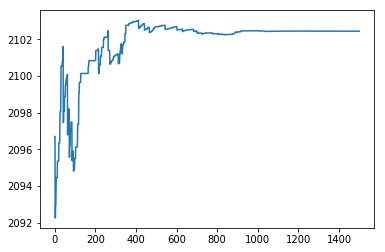

In [99]:
matplotlib.pyplot(scores)
matplotlib.pyplot.show()

# The above plot shows the convergence of the model or after how many iterations Jerry learnt the best path i.e. after approximately 900 iterations.